In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import os
import glob
import time
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from skimage.feature import hog
from skimage import exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler

# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [8]:
class DL:
    def __init__(self):
        return
    
    def file_split(self, file):
        os.mkdir(file) # 創建資料夾
        imagelist = os.listdir('C:/Users/User/Desktop/Deep Learning/Assignment-1 Image classiication/images')
        f = open(file + '.txt') # 打開train.txt檔

        for i in range(22, 50):
            os.mkdir(file + '/' + file + str(i)) # 創建50個類別的資料夾

            for txt in f.readlines(): #逐行讀取test.txt

                for image in glob.glob('images/' + imagelist[i] + '/*.*'): # 讀取images下所有檔案

                    if (txt[17:32] == image[17:32]): # 對比txt及image名稱一不一樣

                        if '.JPEG ' in txt[17:34]: # 1位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:28] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JPEG' in txt[17:34]: # 2位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:29] +'.JPEG', './' + file + '/'+ file + str(i)) # 複製檔案至test目錄
                        elif '.JPE' in txt[17:34]: # 3位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:30] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JP' in txt[17:34]: # 4位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:31] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.J' in txt[17:34]: # 5位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:32] +'.JPEG', './' + file + '/'+ file + str(i))

        f.seek(0)
    
    
    def dataset_split(self, file):
        if file == 'train':
            starttime = int(time.time())
            train_images = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))


            for i in range(len(image_list)):
                j = 0
                for images in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121: # 只取前120張
                        break
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    train_images.append(hog_image)

            train_images = np.array(train_images)
            print(train_images.shape)
            nsamples, nx, ny = train_images.shape
            d2_train_images = train_images.reshape((nsamples,nx*ny))
            print('d2_train_images.type = ', type(d2_train_images))
            print(' d2_train_images.shape =  ', d2_train_images.shape)


            train_labels = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))

            for i in range(len(image_list)):
                j = 0
                for labels in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121:
                        break
                    train_labels.append(i)

            train_labels = np.array(train_labels)
            endtime = int(time.time())
            print('花了',endtime-starttime,'s')
            print('train_labels.type = ', type(validation_labels))
            print('train_labels長度為 ', len(validation_labels))
            
            return d2_validation_images, train_labels
            
        elif file == 'validation':
            
            starttime = int(time.time())
            validation_images = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))

            for i in range(len(image_list)):
                for images in glob.glob('validation/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    validation_images.append(hog_image)

            validation_images = np.array(validation_images)
            print(validation_images.shape)
            nsamples, nx, ny = validation_images.shape
            d2_validation_images = validation_images.reshape((nsamples,nx*ny))
            print('d2_validation_images.type = ', type(d2_validation_images))
            print(' d2_validation_images長度為 ', d2_validation_images.shape)


            validation_labels = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))


            for i in range(len(image_list)):
                for labels in glob.glob('validation/' + image_list[i] + '/*'):
                    validation_labels.append(i)

            validation_labels = np.array(validation_labels)

            endtime = int(time.time())

            print('花了',endtime-starttime,'s')
            print('test_labels.type = ', type(validation_labels))
            print('d2_test_imagest長度為 ', len(validation_labels))
            
            return d2_validation_images, validation_labels
            
        elif file == 'test':
            global d2_test_images, 
            starttime = int(time.time())
            test_images = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))

            for i in range(len(image_list)):
                for images in glob.glob('test/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    test_images.append(hog_image)

            test_images = np.array(test_images)
            print(test_images.shape)
            nsamples, nx, ny = test_images.shape
            d2_test_images = test_images.reshape((nsamples,nx*ny))
            print('d2_test_images.type = ', type(d2_test_images))
            print('d2_test_images形狀為 = ', d2_test_images.shape)


            test_labels = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))


            for i in range(len(image_list)):
                for labels in glob.glob('test/' + image_list[i] + '/*'):
                    test_labels.append(i)

            test_labels = np.array(test_labels)
            endtime = int(time.time())

            print('test_labels.type = ', type(test_labels))
            print('d2_test_imagest長度為 ', len(test_labels))
            print('花了',endtime-starttime,'s')
            return d2_test_images, test_labels

        def 

In [9]:
DL().dataset_split('test')

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

In [10]:
DL().dataset_split('validation')

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

In [14]:
# 將train圖片做特徵提取，並存成np.array
starttime = int(time.time())
train_images = []
image_list = os.listdir('train/')
image_list.sort(key = lambda x: int(x[5:]))

for i in range(len(image_list)):
    for images in glob.glob('train/' + image_list[i] + '/*'):
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        train_images.append(hog_image)

train_images = np.array(train_images)
print(train_images.shape)
nsamples, nx, ny = train_images.shape
d2_train_images = train_images.reshape((nsamples,nx*ny))
print(type(d2_train_images))
print(d2_train_images.shape)
print(d2_train_images)


train_labels = []
image_list = os.listdir('train/')
image_list.sort(key = lambda x: int(x[5:]))

for i in range(len(image_list)):
    for labels in glob.glob('train/' + image_list[i] + '/*'):
        train_labels.append(i)

train_labels = np.array(train_labels)
endtime = int(time.time())
print('花了',endtime-starttime,'s')
print(type(train_labels))
print(len(train_labels))
print(train_labels)

# 儲存data

# pd.DataFrame(d2_train_images).to_csv('d2_train_images.csv', index = False)
# pd.DataFrame(train_labels).to_csv('train_labels.csv', index = False)

(63322, 256, 256)
<class 'numpy.ndarray'>
(63322, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
花了 6241 s
<class 'numpy.ndarray'>
63322
[ 0  0  0 ... 49 49 49]


In [6]:
# 將validation圖片做特徵提取，並存成np.array
starttime = int(time.time())
validation_images = []
image_list = os.listdir('validation/')
image_list.sort(key = lambda x: int(x[10:]))

for i in range(len(image_list)):
    for images in glob.glob('validation/' + image_list[i] + '/*'):
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        validation_images.append(hog_image)

validation_images = np.array(validation_images)
print(validation_images.shape)
nsamples, nx, ny = validation_images.shape
d2_validation_images = validation_images.reshape((nsamples,nx*ny))
print(type(d2_validation_images))
print(d2_validation_images.shape)
print(d2_validation_images)


validation_labels = []
image_list = os.listdir('validation/')
image_list.sort(key = lambda x: int(x[10:]))


for i in range(len(image_list)):
    for labels in glob.glob('validation/' + image_list[i] + '/*'):
        validation_labels.append(i)
        
validation_labels = np.array(validation_labels)

endtime = int(time.time())
print(type(validation_labels))
print(len(validation_labels))
print(validation_labels)
print('花了',endtime-starttime,'s')
# 儲存data

# pd.DataFrame(d2_validation_images).to_csv('d2_validation_images.csv', index = False)
# pd.DataFrame(validation_labels).to_csv('validation_labels.csv', index = False)

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

In [7]:
# 將test圖片做特徵提取，並存成np.array
starttime = int(time.time())
test_images = []
image_list = os.listdir('test/')
image_list.sort(key = lambda x: int(x[4:]))

for i in range(len(image_list)):
    for images in glob.glob('test/' + image_list[i] + '/*'):
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        test_images.append(hog_image)

test_images = np.array(test_images)
print(test_images.shape)
nsamples, nx, ny = test_images.shape
d2_test_images = test_images.reshape((nsamples,nx*ny))
print(type(d2_test_images))
print(d2_test_images.shape)
print(d2_test_images)


test_labels = []
image_list = os.listdir('test/')
image_list.sort(key = lambda x: int(x[4:]))


for i in range(len(image_list)):
    for labels in glob.glob('test/' + image_list[i] + '/*'):
        test_labels.append(i)
        
test_labels = np.array(test_labels)
endtime = int(time.time())

print(type(test_labels))
print(len(test_labels))
print(test_labels)
print('花了',endtime-starttime,'s')
# 儲存data

# pd.DataFrame(d2_test_images).to_csv('d2_test_images.csv', index = False)
# pd.DataFrame(test_labels).to_csv('test_labels.csv', index = False)

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

In [13]:
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# 正確解答資料的one-hot化
# y = label_binarize(y, classes = [0, 1, 2])


# multi-class classification model
SVC = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state=0))
y_score = SVC.fit(d2_validation_images,validation_labels).predict_proba(d2_test_images)

# 分別對於三個類別，視為1維資料，計算ROC曲線、AUC
fpr, tpr, _ = roc_curve(test_labels.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)


# 描繪ROC曲線
plt.plot(fpr, tpr, color = 'red', label = 'average ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle = '--')

plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

KeyboardInterrupt: 

In [14]:
starttime = int(time.time())

Ada = AdaBoostClassifier(n_estimators=100, random_state = 0)
Ada.fit(validation_images_std,validation_labels)

# y_pred = Ada.predict(test_images_std)

endtime = int(time.time())
print('花了',endtime-starttime,'s')
print('準確度（train）:{:.3f}'.format(Ada.score(validation_images_std,validation_labels)))
print('準確度（test）:{:.3f}'.format(Ada.score(validation_images_std,validation_labels)))
# print('精確度：{:.3f}'.format(precision_score(test_labels, y_pred)))
# print('召回率：{:.3f}'.format(recall_score(test_labels, y_pred)))
# print('F1分數：{:.3f}'.format(f1_score(test_labels, y_pred)))

花了 185 s
準確度（train）:0.036
準確度（test）:0.036


In [25]:
from sklearn.neighbors import KNeighborsClassifier
starttime = int(time.time())

KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(validation_images_std,validation_labels)


endtime = int(time.time())
print('花了',endtime-starttime,'s')
print('準確度（train）:{:.3f}'.format(Ada.score(validation_images_std,validation_labels)))
print('準確度（test）:{:.3f}'.format(Ada.score(test_images_std,test_labels)))

花了 0 s
準確度（train）:0.036
準確度（test）:0.022


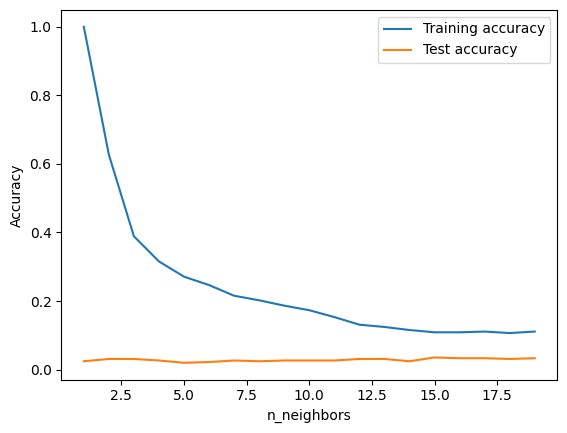

In [30]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 20)
# 學習
for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(validation_images_std, validation_labels)
    training_accuracy.append(KNN.score(validation_images_std,validation_labels))
    test_accuracy.append(KNN.score(test_images_std,test_labels))


plt.plot(neighbors_setting,training_accuracy, label = 'Training accuracy')
plt.plot(neighbors_setting,test_accuracy, label = 'Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
starttime = int(time.time())

log = LogisticRegression(random_state = 0)
log.fit(validation_images_std,validation_labels)


endtime = int(time.time())
print('花了',endtime-starttime,'s')
print('準確度（train）:{:.3f}'.format(log.score(validation_images_std,validation_labels)))
print('準確度（test）:{:.3f}'.format(log.score(test_images_std,test_labels)))

花了 48 s
準確度（train）:1.000
準確度（test）:0.056


C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
starttime = int(time.time())


sc = StandardScaler()
sc.fit(d2_validation_images)
validation_images_std = sc.transform(d2_validation_images)
test_images_std = sc.transform(d2_test_images)


SVC = SVC(kernel='linear', C=1.0, random_state = 0)
SVC.fit(validation_images_std,validation_labels)

# y_pred = SVC.predict(test_images_std)

endtime = int(time.time())
print('花了',endtime-starttime,'s')
print('準確度（train）:{:.3f}'.format(SVC.score(validation_images_std,validation_labels)))
print('準確度（test）:{:.3f}'.format(SVC.score(test_images_std,test_labels)))

花了 9 s
準確度（train）:1.000
準確度（test）:0.058


In [11]:
(836+15+593)/60

24.066666666666666

In [13]:
9130/60/60

2.536111111111111